In [1]:
import numpy as np
import pandas as pd # чтение файлов
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # построение графиков
import statsmodels.api as sm # тесты
import statsmodels
import statsmodels.stats.diagnostic as sm_diagnostic # тест Бройша-Пагана
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
import scipy
import statsmodels.formula.api as smf

## Задание 1

In [2]:
data = pd.read_excel('Homework_2022.xlsx')
data = data[data['id43'] != 0]
data = data[['psu', 'status', 'age', 'male', 'industry', 'wage', 'public',
       'internet', 'children', 'urban', 'educ']]
infos = data[['age', 'male', 'wage', 'public', 'internet', 'children', 'urban', 'educ']]
infos['high'] = (infos['educ'] == 3).astype(int)
infos = infos.reset_index()
reg1 = smf.ols('wage ~ age + high + male + children + urban', data=infos).fit()
reg1.summary()

/var/folders/pt/t48y65vn4rz004152bh8chgr0000gn/T/ipykernel_68407/727839906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infos['high'] = (infos['educ'] == 3).astype(int)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     13.81
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.83e-11
Time:                        16:47:36   Log-Likelihood:                -2030.4
No. Observations:                 191   AIC:                             4073.
Df Residuals:                     185   BIC:                             4092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9749.8693   3320.281      2.936      0.004    3199.387    1.63e+04
age         -111.1272     75.209     -1.478      0.141    -259.504      37.250
high        4870.9276   1565.485      3.111      0.002    1782.430    7959.425
male        8465.8806   1486.154      5.697      0.000    5533.891    1.14e+04
children    1874.9240    980.784      1.912      0.057     -60.036    3809.884
urban       8814.6301   1934.012      4.558      0.000    4999.075    1.26e+04
==============================================================================
Omnibus:                       40.887   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.787
Skew:                           1.065   Prob(JB):                     9.49e-17
Kurtosis:                       5.176   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Уравнение модели:  
$$\widehat{Wage} = 9749.8 - 111.1 \cdot Age + 4870.9 \cdot High + 8465.8 \cdot Male + 1874.9 \cdot Children + 8814.6 \cdot Urban$$
Интерпретация результатов:
* Увеличение возраста на 1 год уменьшает зарплату на 111 единиц при прочих равных
* Люди с высшим образованием получают на 4870 рублей больше, чем без высшего образования при прочих равных
* Мужчины получают на 8485 рублей больше, чем женщины при прочих равных 
* Увеличение числа детей на одного ребенка повышает зарплату на 1875 рублей при прочих равных\
\
На уровне значимости $\alpha = 0.1$ возраст является незначимой переменной, так как p-value = 0.14 > 0.1 $\Rightarrow$ основная гипотеза о равенстве коэффициента перед возрастом нулю не отвергается, остальные переменные значимые

## Задание 2

In [3]:
infos['ln_wage'] = np.log(infos['wage'])
infos

,index,age,male,wage,public,internet,children,urban,educ,high,ln_wage
0,168,52,1,25500,0,0,2,1,0,0,10.146434
1,169,27,0,17500,0,1,1,1,2,0,9.769956
2,170,49,0,17700,1,1,0,1,3,1,9.781320
3,171,39,1,30500,0,1,0,1,1,0,10.325482
4,172,34,0,20500,1,1,1,1,3,1,9.928180
...,...,...,...,...,...,...,...,...,...,...,...
186,3828,37,1,18500,1,0,2,1,2,0,9.825526
187,3829,29,0,11500,0,1,0,1,2,0,9.350102
188,3830,30,1,15500,0,1,0,1,3,1,9.648595
189,3831,30,0,12000,0,1,1,1,2,0,9.392662


In [4]:
reg2 = smf.ols('ln_wage ~ age + high + male + children + urban', data=infos).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     15.40
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.19e-12
Time:                        16:47:36   Log-Likelihood:                -123.20
No. Observations:                 191   AIC:                             258.4
Df Residuals:                     185   BIC:                             277.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2187      0.153     60.279      0.000       8.917       9.520
age           -0.0038      0.003     -1.100      0.273      -0.011       0.003
high           0.1789      0.072      2.482      0.014       0.037       0.321
male           0.4005      0.068      5.850      0.000       0.265       0.536
children       0.0563      0.045      1.246      0.214      -0.033       0.145
urban          0.4803      0.089      5.392      0.000       0.305       0.656
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.687
Skew:                          -0.297   Prob(JB):                       0.0214
Kurtosis:                       3.783   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Уравнение модели:
$$\widehat{\ln Wage} = 9.2 - 0.003 \cdot  Age + 0.17 \cdot High + 0.4 \cdot Male + 0.05 \cdot Children+ 0.48 \cdot Urban$$  
Интерпретация:
* При увеличении возраста на один год при прочих равных заработная плата уменьшается на 0.3% 
* Наличие высшего образования увеличивает заработную плату на 17%
* Мужчины при прочих равных в среднем зарабатывают на 40% больше женщин
* Увеличение количества детей на одного ребенка увеличивает заработную плату на 5% 
* Проживание в городской среде увеличивает заработную плату на 48%  
В данной модели незначимыми переменными оказались возраст и число детей, так как p-value > 0.1 в обоих случаях $\Rightarrow$ нулевая гипотеза о равенстве коэффициентов нулю не отвергается

## Задание 3

In [5]:
infos['ln_age'] = np.log(infos['age'])
reg3 = smf.ols('ln_wage ~ ln_age + high + male + children + urban', data=infos).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.68e-12
Time:                        16:47:36   Log-Likelihood:                -123.58
No. Observations:                 191   AIC:                             259.2
Df Residuals:                     185   BIC:                             278.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4104      0.462     20.366      0.000       8.499      10.322
ln_age        -0.0914      0.132     -0.692      0.490      -0.352       0.169
high           0.1808      0.072      2.503      0.013       0.038       0.323
male           0.4019      0.069      5.860      0.000       0.267       0.537
children       0.0496      0.046      1.076      0.284      -0.041       0.140
urban          0.4748      0.089      5.328      0.000       0.299       0.651
==============================================================================
Omnibus:                        6.688   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                7.614
Skew:                          -0.286   Prob(JB):                       0.0222
Kurtosis:                       3.793   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Уравнение модели:
$$ \widehat{\ln Wage} = 9.41 - 0.09 \cdot \ln Age + 0.18 \cdot High + 0.4 \cdot Male + 0.05 \cdot Children + 0.47 \cdot Urban$$  
Интерпретация качественных переменных соответствует полулогарифмической модели, а интерпретация возраста меняется: при увеличении возраста на 1% при прочих равных заработная плата падает на 0.09%  
Так же как в случае полулогарифмической модели, коэффициенты перед логарифмом возраста и числом детей оказались незначимыми, так как p-value > 0.1 $\Rightarrow$ основная гипотеза о равенстве коэффициентов нулю не отвергается

## Задание 4

Сравним полулогарифмическую модель с линейной при помощи теста Бокса-Кокса с преобразованием зарембки.
$$H_0 : \text{качество подгонки моделей одинаковое} \\
H_1: \text{модель с меньшей RSS лучше}$$

In [6]:
gY = scipy.stats.gmean(infos['wage'])
infos['wage_star'] = infos['wage']/gY
infos['ln_wage_star'] = np.log(infos['wage_star'] )
reg4 = smf.ols('wage_star ~ age + high + male + children + urban', data=infos).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wage_star   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     13.81
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.83e-11
Time:                        16:47:57   Log-Likelihood:                -166.82
No. Observations:                 191   AIC:                             345.6
Df Residuals:                     185   BIC:                             365.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5643      0.192      2.936      0.004       0.185       0.943
age           -0.0064      0.004     -1.478      0.141      -0.015       0.002
high           0.2819      0.091      3.111      0.002       0.103       0.461
male           0.4900      0.086      5.697      0.000       0.320       0.660
children       0.1085      0.057      1.912      0.057      -0.003       0.221
urban          0.5102      0.112      4.558      0.000       0.289       0.731
==============================================================================
Omnibus:                       40.887   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.787
Skew:                           1.065   Prob(JB):                     9.49e-17
Kurtosis:                       5.176   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
reg5 = smf.ols('ln_wage_star ~ age + high + male + children + urban', data=infos).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_wage_star   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     15.40
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.19e-12
Time:                        16:47:57   Log-Likelihood:                -123.20
No. Observations:                 191   AIC:                             258.4
Df Residuals:                     185   BIC:                             277.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5385      0.153     -3.521      0.001      -0.840      -0.237
age           -0.0038      0.003     -1.100      0.273      -0.011       0.003
high           0.1789      0.072      2.482      0.014       0.037       0.321
male           0.4005      0.068      5.850      0.000       0.265       0.536
children       0.0563      0.045      1.246      0.214      -0.033       0.145
urban          0.4803      0.089      5.392      0.000       0.305       0.656
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.687
Skew:                          -0.297   Prob(JB):                       0.0214
Kurtosis:                       3.783   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
chi_sq = len(infos)/2 * np.abs(np.log(reg4.ssr / reg5.ssr))
chi_sq > scipy.stats.chi2.ppf(0.9, 1)

True

Наблюдаемое значение больше критического на уровне значимости $\alpha = 0.1$, поэтому гипотеза $H_0$ отвергается, значит, качество подгонок модели разное

In [9]:
reg4.ssr,reg5.ssr

(64.14605074526311, 40.62894459797576)

Сравнением RSS приходим к выводу, что полулогарифмическая модель лучше линейной, так как имеет меньшую RSS

Теперь для полулогарифмической и логарифмической посмотрим на adj. R^2, посчитанные в 1 и во 2 задании. Для полулогарифмической модели он равен 0.275, а для логарифмической 0.272, поэтому лучше использовать полулогарифмическую, на ней и остановимся

Можем сравнить линейную и логарифмическую модель с помощью PE теста:

In [10]:
# сравним линейную и линейную в логарифмах с помощью PE теста
infos['add1'] = reg3.predict() - np.log(reg1.predict())
infos['add2'] = reg1.predict() - np.exp(reg3.predict())

In [11]:
reg1_add = smf.ols("wage ~ age + high + male + children + urban + add1", data = infos).fit()
print(reg1_add.summary())
reg3_add = smf.ols("ln_wage ~ ln_age + high + male + children + urban + add2", data = infos).fit()
print(reg3_add.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     11.74
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.97e-11
Time:                        16:48:08   Log-Likelihood:                -2029.8
No. Observations:                 191   AIC:                             4074.
Df Residuals:                     184   BIC:                             4096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+04   3418.328      3.125      0.0

Обе добавки незначимые, поэтому существенной разницы подгонки между логарифмической и линейной нет

## Задание 5

Сначала протестируем с помощью теста на дамми переменные - добавим все перекрестные переменные

In [12]:
infos['mage'] = infos['age']*infos['male']
infos['mhigh'] = infos['high']*infos['male']
infos['mchildren'] = infos['children']*infos['male']
infos['murban'] = infos['urban']*infos['male']

In [13]:
reg6 = smf.ols('ln_wage ~ age + high + male + children + urban + mage + mhigh + mchildren + murban', data=infos).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     8.855
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.21e-11
Time:                        16:48:14   Log-Likelihood:                -121.59
No. Observations:                 191   AIC:                             263.2
Df Residuals:                     181   BIC:                             295.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2959      0.200     46.486      0.000       8.901       9.690
age           -0.0021      0.004     -0.460      0.646      -0.011       0.007
high           0.2010      0.098      2.061      0.041       0.009       0.394
male           0.2733      0.301      0.907      0.365      -0.321       0.867
children      -0.0162      0.063     -0.256      0.798      -0.141       0.108
urban          0.3933      0.125      3.150      0.002       0.147       0.640
mage          -0.0038      0.007     -0.538      0.591      -0.018       0.010
mhigh         -0.0644      0.146     -0.442      0.659      -0.352       0.223
mchildren      0.1504      0.091      1.650      0.101      -0.029       0.330
murban         0.1653      0.179      0.923      0.357      -0.188       0.518
==============================================================================
Omnibus:                        4.626   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.860
Skew:                          -0.217   Prob(JB):                       0.0880
Kurtosis:                       3.650   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$H_0 : \beta_{male} = \beta_{mage} = \beta_{mhigh} = \beta_{mchildren} = \beta_{murban} = 0 \\
H_1 : \beta_{male}^2 + \beta_{mage}^2 + \beta_{mhigh}^2 + \beta_{mchildren}^2 + \beta_{murban}^2 > 0$$

In [14]:
hypotheses = '(male = 0, mage = 0, mhigh = 0, mchildren = 0, murban = 0)'
print(reg6.f_test(r_matrix = hypotheses))

<F test: F=array([[7.42686413]]), p=2.325122261856237e-06, df_denom=181, df_num=5>


p-value $\approx 0 \Rightarrow H_0$ отвергается, то есть различия между з/п для мужчин и женщин есть

Теперь проделаем то же самое для теста Чоу, здесь будем оценивать отдельно модели для мужчин и женщин

In [15]:
infos_male = infos[infos['male'] == 1]
infos_female = infos[infos['male'] == 0]

In [16]:
reg_male = smf.ols('ln_wage ~ age + high + children + urban', data=infos_male).fit()
rss_1 = reg_male.ssr
reg_female = smf.ols('ln_wage ~ age + high + children + urban', data=infos_female).fit()
rss_2 = reg_female.ssr
reg_p = smf.ols('ln_wage ~ age + high + children + urban', data=infos).fit()
rss_p = reg_p.ssr

$$H_0: \text{все коэффициенты и дисперсии случайной составляющей в моделях для мужчин и женщин совпадают }\\
H_1: \text{Найдется коэффициент, который отличается в двух моделях}$$

In [17]:
F = ((rss_p - (rss_1 + rss_2))/5)/((rss_1 + rss_2)/(len(infos) - 10))
p_val = 1-scipy.stats.f.cdf(F, 5, len(infos) - 10)
p_val

2.3251222618370093e-06

p-value $\approx 0 \Rightarrow H_0$ отвергается, поэтому есть различия в моделях для мужчин и женщин 

Чтобы сгладить это различие добавим дамми переменную на пол, которая изначально и была в нашей модели

## Задание 6

Сначала соберем информацию

In [18]:
influence = reg2.get_influence()
inf_sum = influence.summary_frame()
results = pd.concat([infos, inf_sum], axis = 1)
print(inf_sum.head())

   dfb_Intercept   dfb_age  dfb_high  dfb_male  dfb_children  dfb_urban  \
0      -0.024845  0.013610 -0.016994  0.023796      0.016987   0.021117   
1       0.024404 -0.025237 -0.020432 -0.018687      0.008550   0.016036   
2      -0.006108  0.022456  0.015660 -0.013000     -0.025793  -0.005201   
3       0.005048  0.028249 -0.055668  0.056305     -0.075871   0.017054   
4       0.009660 -0.010705  0.020502 -0.016318      0.004020   0.005505   

    cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
0  0.000383        0.286746  0.027201         0.047949       0.286033   
1  0.000293        0.254170  0.026463         0.041905       0.253526   
2  0.000252        0.195893  0.037958         0.038911       0.195383   
3  0.002910        0.809909  0.025929         0.132140       0.809153   
4  0.000227        0.266000  0.018854         0.036874       0.265331   

     dffits  
0  0.047830  
1  0.041799  
2  0.038810  
3  0.132016  
4  0.036781  


In [19]:
leverage = influence.hat_matrix_diag
cutoff_leverage = (2*6)/len(infos)
high_leverage = pd.DataFrame((results[abs(leverage) > cutoff_leverage]))
high_leverage

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
98,1848,40,0,9600,1,1,4,0,0,0,...,0.006790,0.015774,-0.060968,0.012186,0.001003,-0.270513,0.075963,-0.077561,-0.269834,-0.077367
160,3386,23,0,9500,1,1,0,0,3,1,...,-0.039276,0.024458,0.037838,0.065946,0.001357,-0.333709,0.068130,-0.090232,-0.332906,-0.090015


Согласно левериджу, влиятельных наблюдения 3, можно предположить, что это связано с очень низкой зарплатой, особенно учитывая возраст людей. На всякий случай, выведем показатели воздействия:

In [20]:
infl = reg2.resid * influence.hat_matrix_diag / (1 - influence.hat_matrix_diag)
infl

0      0.003706
1      0.003195
2      0.003553
3      0.009971
4      0.002373
         ...   
186   -0.007356
187   -0.006841
188   -0.014678
189   -0.005742
190    0.001034
Length: 191, dtype: float64

In [21]:
dffits = influence.dffits
cutoff_dffits = 2*np.sqrt(6/len(infos))
dffits_high = pd.DataFrame((results[abs(inf_sum.dffits) > cutoff_dffits]))
dffits_high

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
68,1707,21,1,5500,0,1,0,1,3,1,...,-0.290601,-0.281253,0.110875,-0.010687,0.072865,-3.445874,0.035511,-0.661202,-3.552444,-0.681651
83,1722,52,1,70500,1,1,2,1,3,1,...,0.205932,0.201232,0.135645,0.081448,0.025099,2.105846,0.032843,0.388063,2.125780,0.391736
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
116,2248,40,1,56500,1,1,3,1,3,1,...,0.138686,0.144031,0.291160,0.120011,0.021599,1.424371,0.060041,0.359990,1.428370,0.361001
117,2249,37,0,60500,0,1,2,1,3,1,...,0.207111,-0.141223,0.263207,0.129084,0.030200,2.512412,0.027905,0.425678,2.549484,0.431959
140,2888,22,0,40500,0,1,0,1,2,0,...,-0.185778,-0.175902,-0.104529,0.077601,0.028067,2.158720,0.034876,0.410366,2.180516,0.414509
144,2961,46,1,35500,1,1,2,0,1,0,...,-0.034903,0.160694,0.029072,-0.228046,0.021440,1.996462,0.031265,0.358662,2.012861,0.361608
174,3692,20,0,5500,1,1,0,1,2,0,...,0.190950,0.179952,0.092121,-0.083520,0.031678,-2.197911,0.037856,-0.435970,-2.221155,-0.440580


Согласно DFFITS найдено 9 влиятельных наблюдений: люди с разными харакетристиками, четко прослеживается две категории: люди с аномально низкими зарплатами, и люди с зарплатами сильно выше средней по региону 

In [22]:
cut_off = 2 / np.sqrt(len(infos))
print(cut_off)

0.14471492105848432


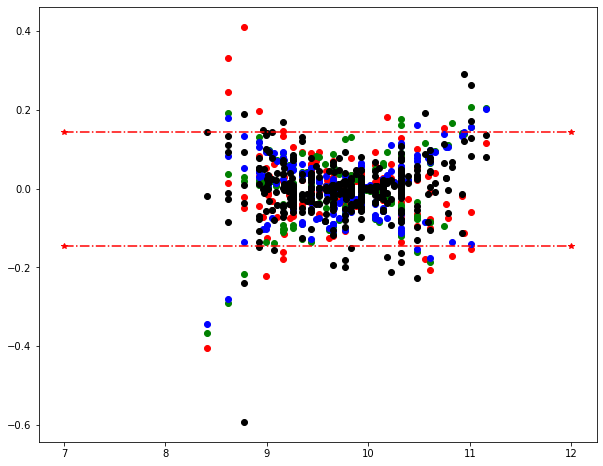

In [23]:
fig,ax = plt.subplots(figsize = (10,8))
plt.scatter(results.ln_wage, results.dfb_age, color = "red", marker = "o")
plt.scatter(results.ln_wage, results.dfb_high, color = "green", marker = "o")
plt.scatter(results.ln_wage, results.dfb_male, color = "blue", marker = "o")
plt.scatter(results.ln_wage, results.dfb_children, color = "black", marker = "o")
plt.scatter(results.ln_wage, results.dfb_urban, color = "black", marker = "o")
plt.plot((7,12),(0.1447, 0.1447), '-.r*')
plt.plot((7,12),(-0.1447, -0.1447), '-.r*')

На графике видно, что по разным переменным наблюдаются влиятельные наблюдения согласно DFBETAS, проанализируем по отдельности

In [24]:
high_dfb_age = pd.DataFrame((results[abs(results.dfb_age) > cut_off]))
high_dfb_age

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
6,174,57,0,9500,1,1,1,1,3,1,...,-0.103363,0.072100,0.072505,0.001904,0.008657,-1.211624,0.034171,-0.227902,-1.213168,-0.228192
48,1044,58,1,46500,1,1,2,1,2,0,...,-0.095120,0.138698,0.065966,0.112446,0.015478,1.641160,0.033331,0.304744,1.648764,0.306156
53,1256,29,0,38500,0,1,2,1,3,1,...,0.117190,-0.083805,0.192473,0.087001,0.014525,1.476245,0.038452,0.295210,1.480999,0.296160
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
68,1707,21,1,5500,0,1,0,1,3,1,...,-0.290601,-0.281253,0.110875,-0.010687,0.072865,-3.445874,0.035511,-0.661202,-3.552444,-0.681651
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
117,2249,37,0,60500,0,1,2,1,3,1,...,0.207111,-0.141223,0.263207,0.129084,0.030200,2.512412,0.027905,0.425678,2.549484,0.431959
128,2572,29,0,50500,0,1,1,1,3,1,...,0.166451,-0.136459,0.068910,0.056286,0.018652,2.171928,0.023175,0.334536,2.194206,0.337967
136,2884,24,0,7500,0,1,1,1,1,0,...,0.131935,0.119796,-0.070336,-0.107068,0.013912,-1.606991,0.031311,-0.288915,-1.613946,-0.290166
140,2888,22,0,40500,0,1,0,1,2,0,...,-0.185778,-0.175902,-0.104529,0.077601,0.028067,2.158720,0.034876,0.410366,2.180516,0.414509


По переменной age сложно сделать однозначные выводы, но влиятельных наблюдений достаточно. В частности, присутствуют люди в самом работоспособном возрасте 25-30 лет, которые получают мало, а также люди в более старшем возрасте, которые все еще работают и зарабатывают много - мужчина 58 лет, который получает 465000 рублей

In [25]:
high_dfb_high = pd.DataFrame((results[abs(results.dfb_high) > cut_off]))
high_dfb_high

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
68,1707,21,1,5500,0,1,0,1,3,1,...,-0.290601,-0.281253,0.110875,-0.010687,0.072865,-3.445874,0.035511,-0.661202,-3.552444,-0.681651
83,1722,52,1,70500,1,1,2,1,3,1,...,0.205932,0.201232,0.135645,0.081448,0.025099,2.105846,0.032843,0.388063,2.125780,0.391736
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
108,1858,33,1,30500,1,1,2,0,3,1,...,0.161762,0.107485,0.073212,-0.163498,0.012949,1.185004,0.052429,0.278739,1.186308,0.279046
109,1859,43,1,30500,1,1,2,0,3,1,...,0.176642,0.116091,0.036421,-0.186916,0.013670,1.266030,0.048681,0.286392,1.268109,0.286863
115,2247,40,1,60500,0,1,2,1,3,1,...,0.156352,0.156810,0.172944,0.084068,0.015045,1.673327,0.031231,0.300445,1.681573,0.301925
117,2249,37,0,60500,0,1,2,1,3,1,...,0.207111,-0.141223,0.263207,0.129084,0.030200,2.512412,0.027905,0.425678,2.549484,0.431959
128,2572,29,0,50500,0,1,1,1,3,1,...,0.166451,-0.136459,0.068910,0.056286,0.018652,2.171928,0.023175,0.334536,2.194206,0.337967
140,2888,22,0,40500,0,1,0,1,2,0,...,-0.185778,-0.175902,-0.104529,0.077601,0.028067,2.158720,0.034876,0.410366,2.180516,0.414509


По высшему образованию также присутствуют влиятельные наблюдения, тут мы видим людей с наличием высшего образования, которые получают мало или наоборот выше среднего, а также людей без высшего образования, которые получают выше среднего

In [26]:
high_dfb_male = pd.DataFrame((results[abs(results.dfb_male) > cut_off]))
high_dfb_male

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
68,1707,21,1,5500,0,1,0,1,3,1,...,-0.290601,-0.281253,0.110875,-0.010687,0.072865,-3.445874,0.035511,-0.661202,-3.552444,-0.681651
83,1722,52,1,70500,1,1,2,1,3,1,...,0.205932,0.201232,0.135645,0.081448,0.025099,2.105846,0.032843,0.388063,2.125780,0.391736
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
115,2247,40,1,60500,0,1,2,1,3,1,...,0.156352,0.156810,0.172944,0.084068,0.015045,1.673327,0.031231,0.300445,1.681573,0.301925
140,2888,22,0,40500,0,1,0,1,2,0,...,-0.185778,-0.175902,-0.104529,0.077601,0.028067,2.158720,0.034876,0.410366,2.180516,0.414509
144,2961,46,1,35500,1,1,2,0,1,0,...,-0.034903,0.160694,0.029072,-0.228046,0.021440,1.996462,0.031265,0.358662,2.012861,0.361608
174,3692,20,0,5500,1,1,0,1,2,0,...,0.190950,0.179952,0.092121,-0.083520,0.031678,-2.197911,0.037856,-0.435970,-2.221155,-0.440580
182,3700,28,0,35500,0,1,0,1,2,0,...,-0.160221,-0.153899,-0.129887,0.057176,0.017987,1.915906,0.028561,0.328516,1.929964,0.330927


По переменной пола несколько меньше влиятельных наблюдений, присутствуют как мужчины, так и женщины

In [27]:
high_dfb_children = pd.DataFrame((results[abs(results.dfb_children) > cut_off]))
high_dfb_children

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
53,1256,29,0,38500,0,1,2,1,3,1,...,0.117190,-0.083805,0.192473,0.087001,0.014525,1.476245,0.038452,0.295210,1.480999,0.296160
57,1323,40,0,8700,1,1,2,1,3,1,...,-0.136790,0.091640,-0.155589,-0.079404,0.012115,-1.658250,0.025754,-0.269611,-1.666191,-0.270902
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
90,1840,39,0,7500,0,0,2,1,0,0,...,0.119047,0.106500,-0.148424,-0.135303,0.011029,-1.600035,0.025197,-0.257241,-1.606862,-0.258339
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
115,2247,40,1,60500,0,1,2,1,3,1,...,0.156352,0.156810,0.172944,0.084068,0.015045,1.673327,0.031231,0.300445,1.681573,0.301925
116,2248,40,1,56500,1,1,3,1,3,1,...,0.138686,0.144031,0.291160,0.120011,0.021599,1.424371,0.060041,0.359990,1.428370,0.361001
117,2249,37,0,60500,0,1,2,1,3,1,...,0.207111,-0.141223,0.263207,0.129084,0.030200,2.512412,0.027905,0.425678,2.549484,0.431959
132,2621,42,1,15500,1,1,3,1,1,0,...,0.061194,-0.090005,-0.193634,-0.118719,0.009376,-1.007696,0.052495,-0.237189,-1.007738,-0.237199
146,2963,55,0,9500,1,1,0,1,3,1,...,-0.092144,0.073958,0.170257,0.036488,0.010891,-1.115118,0.049925,-0.255623,-1.115857,-0.255793


По переменной дети много влиятельных наблюдений, с разным количеством детей от 0 до 3

In [28]:
high_dfb_urban = pd.DataFrame((results[abs(results.dfb_urban) > cut_off]))
high_dfb_urban

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
31,518,50,1,7800,1,0,2,0,1,0,...,0.020266,-0.101244,-0.001782,0.147808,0.009207,-1.257564,0.033752,-0.235037,-1.259555,-0.235409
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
93,1843,39,0,17500,1,1,1,0,3,1,...,0.126483,-0.065781,-0.067263,-0.181475,0.008561,1.015850,0.047413,0.226636,1.015938,0.226655
94,1844,39,1,27500,1,1,1,0,1,0,...,-0.033682,0.110609,-0.091988,-0.211010,0.013085,1.508656,0.033344,0.280198,1.513915,0.281175
96,1846,41,0,18500,1,1,2,0,3,1,...,0.131314,-0.059996,0.026701,-0.151584,0.008098,1.029064,0.043872,0.220433,1.029229,0.220468
97,1847,44,1,6500,1,1,2,0,1,0,...,0.030712,-0.136021,-0.035808,0.190236,0.015249,-1.700277,0.030677,-0.302475,-1.709081,-0.304041
108,1858,33,1,30500,1,1,2,0,3,1,...,0.161762,0.107485,0.073212,-0.163498,0.012949,1.185004,0.052429,0.278739,1.186308,0.279046
109,1859,43,1,30500,1,1,2,0,3,1,...,0.176642,0.116091,0.036421,-0.186916,0.013670,1.266030,0.048681,0.286392,1.268109,0.286863
114,1864,39,0,17500,1,1,1,0,2,0,...,-0.046105,-0.105781,-0.098030,-0.198354,0.011343,1.397063,0.033695,0.260882,1.400690,0.261560
144,2961,46,1,35500,1,1,2,0,1,0,...,-0.034903,0.160694,0.029072,-0.228046,0.021440,1.996462,0.031265,0.358662,2.012861,0.361608


По проживанию в городской среде в основом люди, которые живут не в городе, при этом разброс зарплат внутри наблюдений существенный (есть те, кто зарабатывают мало, так и те, кто зарабатывает много)

In [29]:
student_resid = influence.resid_studentized_external
crit = scipy.stats.t(df=(len(infos) - 7)).ppf((0.95))
high_stud_res = pd.DataFrame((results[abs(student_resid) > crit]))
high_stud_res

,index,age,male,wage,public,internet,children,urban,educ,high,...,dfb_high,dfb_male,dfb_children,dfb_urban,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
57,1323,40,0,8700,1,1,2,1,3,1,...,-0.136790,0.091640,-0.155589,-0.079404,0.012115,-1.658250,0.025754,-0.269611,-1.666191,-0.270902
60,1388,30,0,6500,0,1,3,1,3,1,...,-0.216276,0.132686,-0.592590,-0.238762,0.081638,-2.551114,0.069995,-0.699878,-2.590178,-0.710595
68,1707,21,1,5500,0,1,0,1,3,1,...,-0.290601,-0.281253,0.110875,-0.010687,0.072865,-3.445874,0.035511,-0.661202,-3.552444,-0.681651
83,1722,52,1,70500,1,1,2,1,3,1,...,0.205932,0.201232,0.135645,0.081448,0.025099,2.105846,0.032843,0.388063,2.125780,0.391736
91,1841,53,1,4500,0,1,1,1,3,1,...,-0.365563,-0.343000,0.144914,-0.017570,0.075479,-3.731477,0.031500,-0.672960,-3.869859,-0.697916
97,1847,44,1,6500,1,1,2,0,1,0,...,0.030712,-0.136021,-0.035808,0.190236,0.015249,-1.700277,0.030677,-0.302475,-1.709081,-0.304041
115,2247,40,1,60500,0,1,2,1,3,1,...,0.156352,0.156810,0.172944,0.084068,0.015045,1.673327,0.031231,0.300445,1.681573,0.301925
117,2249,37,0,60500,0,1,2,1,3,1,...,0.207111,-0.141223,0.263207,0.129084,0.030200,2.512412,0.027905,0.425678,2.549484,0.431959
127,2571,32,1,55500,1,1,0,1,3,1,...,0.141739,0.133579,-0.111527,-0.012878,0.012827,1.660728,0.027147,0.277418,1.668719,0.278753
128,2572,29,0,50500,0,1,1,1,3,1,...,0.166451,-0.136459,0.068910,0.056286,0.018652,2.171928,0.023175,0.334536,2.194206,0.337967


Стьюдентизированные остатки показывают наличие выбросов, их насчиталось 14 штук, выкинем их из модели и переоценим без них

In [30]:
infos_new = infos.drop(list(high_stud_res.index))
infos_new = infos_new.reset_index()
reg_new = smf.ols('ln_wage ~ age + high + male + children + urban', data=infos_new).fit()
reg_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     23.56
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.61e-18
Time:                        16:48:32   Log-Likelihood:                -75.988
No. Observations:                 177   AIC:                             164.0
Df Residuals:                     171   BIC:                             183.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2025      0.129     71.159      0.000       8.947       9.458
age           -0.0040      0.003     -1.377      0.170      -0.010       0.002
high           0.1998      0.061      3.272      0.001       0.079       0.320
male           0.4223      0.058      7.318      0.000       0.308       0.536
children       0.0613      0.038      1.592      0.113      -0.015       0.137
urban          0.4789      0.074      6.498      0.000       0.333       0.624
==============================================================================
Omnibus:                       13.683   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.102
Skew:                           0.025   Prob(JB):                       0.0780
Kurtosis:                       2.170   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как мы видим, adj R^2 значительно вырос, а критерии информативности упали, переменные age и children остались незначимыми, при этом модель гораздо лучше показывает себя по всем критериям после того, как мы удалили выбросы

## Задание 7

In [31]:
infos_new[['age', 'high', 'male', 'children', 'urban']].corr()

,age,high,male,children,urban
age,1.000000,-0.068043,-0.085155,0.413209,-0.004861
high,-0.068043,1.000000,-0.089922,-0.167663,0.229528
male,-0.085155,-0.089922,1.000000,-0.077972,0.014290
children,0.413209,-0.167663,-0.077972,1.000000,-0.333873
urban,-0.004861,0.229528,0.014290,-0.333873,1.000000


Исходя из матрицы корреляций, высокая корреляция присутствует между возрастом и числом детей, а также между числом детей и проживанием в городской среде

In [32]:
variables = reg_new.model.exog
var_names = reg_new.model.exog_names
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"]   = var_names[1:]
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(1, variables.shape[1])]
print(vif)

   Variable  VIF Factor
0       age    1.241127
1      high    1.079127
2      male    1.021065
3  children    1.402917
4     urban    1.196153


In [33]:
print(1/(1 - smf.ols("age ~ 1 + high + male + children + urban", data = infos_new).fit().rsquared)) # убедимся, что верно посчитали

1.2411273681548853


Как мы видим, все vif не превосходят 2, а критическим значением является 10, поэтому можно утверждать, что мультиколлинеарности нет

In [34]:
inf = infos_new.drop(index = [10, 20, 30 , 40, 50])
reg_drop = smf.ols('ln_wage ~ age + high + male + children + urban', data=inf).fit()
reg_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     23.20
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.24e-17
Time:                        16:48:43   Log-Likelihood:                -74.217
No. Observations:                 172   AIC:                             160.4
Df Residuals:                     166   BIC:                             179.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2209      0.130     70.690      0.000       8.963       9.478
age           -0.0041      0.003     -1.384      0.168      -0.010       0.002
high           0.1934      0.062      3.119      0.002       0.071       0.316
male           0.4355      0.059      7.432      0.000       0.320       0.551
children       0.0558      0.039      1.434      0.154      -0.021       0.133
urban          0.4649      0.075      6.206      0.000       0.317       0.613
==============================================================================
Omnibus:                       13.162   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.955
Skew:                           0.032   Prob(JB):                       0.0839
Kurtosis:                       2.171   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     23.56
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.61e-18
Time:                        16:48:44   Log-Likelihood:                -75.988
No. Observations:                 177   AIC:                             164.0
Df Residuals:                     171   BIC:                             183.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2025      0.129     71.159      0.000       8.947       9.458
age           -0.0040      0.003     -1.377      0.170      -0.010       0.002
high           0.1998      0.061      3.272      0.001       0.079       0.320
male           0.4223      0.058      7.318      0.000       0.308       0.536
children       0.0613      0.038      1.592      0.113      -0.015       0.137
urban          0.4789      0.074      6.498      0.000       0.333       0.624
==============================================================================
Omnibus:                       13.683   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.102
Skew:                           0.025   Prob(JB):                       0.0780
Kurtosis:                       2.170   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как мы видим, убрав несколько наблюдений, оценки коэффициентов модели практически не изменились, как и стандартные отклонения оценок, поэтому мультиколлинеарность не наблюдается

## Задание 8

В данной задачи применение метода главных компонент практически невозможно, так как возраст - единственная непрерывная переменная. Кроме того, МГК обычно делают для избавления от мультиколлинеарности, но в прошлом пункте мы убедились, что такой проблемы не стоит перед нами. Все же, попробуем сделать МГК на все переменные кроме дамми, а именно, возраст и число детей:

In [36]:
from sklearn.decomposition import PCA # функция PCA, вычисляющая главные компоненты
from sklearn.preprocessing import StandardScaler # стандартизация признаков
features = ['age','children'] # добавляем количественные регрессоры в отдельный список
x = infos_new[features] # отбираем признаки
y = infos_new['ln_wage'] # выделяем целевую переменную
x_scaled = StandardScaler().fit_transform(x) # стандартизируем регрессоры


In [37]:
pca_model = PCA(n_components=2)
principalComponents = pca_model.fit_transform(x_scaled)
principaldata = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) # создаем таблицу, в которую сохраняем значения найденных компонент
principaldata['ln_wage'] = y
principaldata['high'] = infos_new['high']
principaldata['male'] = infos_new['male']
principaldata['urban'] = infos_new['urban']

Text(0.5, 0, 'Главные компоненты')

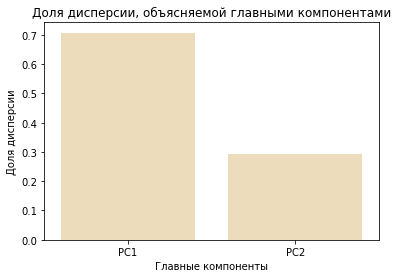

In [38]:
d = pd.DataFrame({'var':pca_model.explained_variance_ratio_, 'PC':['PC1', 'PC2']})
graph = sns.barplot(x = 'PC', y = 'var', data = d, color = 'wheat')
graph.set_title('Доля дисперсии, объясняемой главными компонентами')
graph.set_ylabel('Доля дисперсии')
graph.set_xlabel('Главные компоненты')

Видим, что первая главная компонента объясняет 70% разброса

In [39]:
regpca = smf.ols('ln_wage ~ PC1 + PC2 + high + male + urban', data=principaldata).fit()
regpca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     23.56
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.61e-18
Time:                        16:48:48   Log-Likelihood:                -75.988
No. Observations:                 177   AIC:                             164.0
Df Residuals:                     171   BIC:                             183.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1116      0.069    131.500      0.000       8.975       9.248
PC1            0.0071      0.025      0.286      0.776      -0.042       0.056
PC2            0.0687      0.039      1.761      0.080      -0.008       0.146
high           0.1998      0.061      3.272      0.001       0.079       0.320
male           0.4223      0.058      7.318      0.000       0.308       0.536
urban          0.4789      0.074      6.498      0.000       0.333       0.624
==============================================================================
Omnibus:                       13.683   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.102
Skew:                           0.025   Prob(JB):                       0.0780
Kurtosis:                       2.170   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 и информационные критерии не изменились, изменились только коэффициенты, так как перешли к другим признакам. Таким образом, убедились, что в нашем случае использовать МГК бессмысленно

## Задание 9

In [40]:
reg_new = smf.ols('ln_wage ~ age + high + male + children + urban', data=infos_new).fit()
infos_new['yhat'] = reg_new.predict(infos_new[['age', 'high', 'male', 'children', 'urban']])

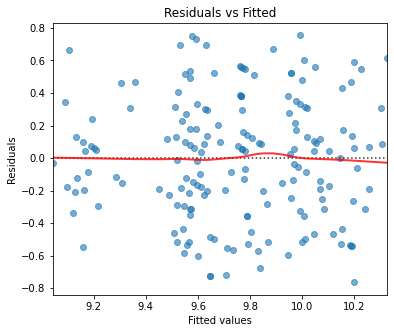

In [41]:
fig_1 = plt.figure(1, figsize = (6,5))
fig_1.axes[0] = sns.residplot(data = infos_new, x = 'yhat', y = 'ln_wage',
                                  lowess=True,
                                  scatter_kws={'alpha': 0.6},
                                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
fig_1.axes[0].set_title('Residuals vs Fitted')
fig_1.axes[0].set_xlabel('Fitted values')
fig_1.axes[0].set_ylabel('Residuals');

Как мы видим, модель хорошо справляется с предсказаниями заработной платы, график остатки-прогнозы проходит близко к прямой линии, хотя, безусловно, ни одна модель не может идеально достичь прямой линии. Мы видим, что модель отлично справляется с низкими значениями, чуть похуже с высокими, но в целом построенная модель удачно ложится на реальные данные, так как в среднем значение остатков очень близко к нулю для всех прогнозных значений

## Задание 10

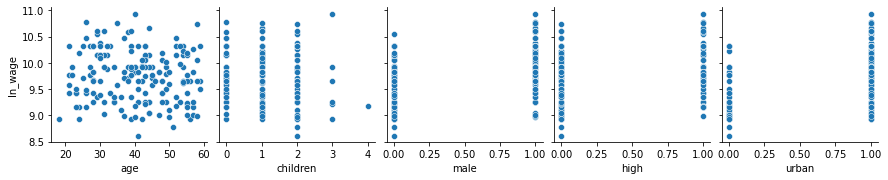

In [42]:
sns.pairplot(infos_new, x_vars=['age', 'children', 'male', 'high', 'urban'], y_vars=["ln_wage"])

По диаграммам рассеяния можно сделать вывод, что гетероскедастичность не наблюдается, потому что из первой диаграммы видно, что облако точек разреженное и не расширяется по мере увеличения возраста, а другие признаки - качественные переменные, по ним в приниципе графически мало что можно вывести

/Users/nikitaorlov/Documents/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


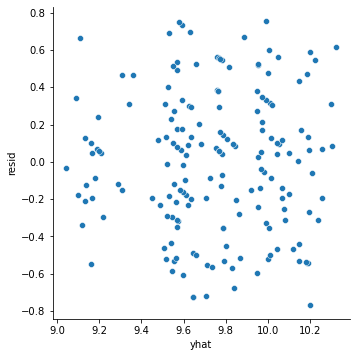

In [43]:
infos_new['resid'] = reg_new.resid
infos_new['resid2'] = reg_new.resid**2
sns.pairplot(infos_new, x_vars=['yhat'], y_vars=["resid"], size=5)

График остатков к прогнозам также выглядит, как разреженное облако, не наблюдается зависимости между прогнозами и остаткам, поэтому можно предположить, что ошибки гомоскедастичны

Проведем тест Уайта:
$$H_0: \text{ошибки гомоскедастичны}\\
H_1: \text{ошибки гетероскедастичны}$$

In [44]:
infos_new['age2'] = infos_new['age']**2
infos_new['children2'] = infos_new['children']**2
infos_new['agechildren'] = infos_new['age'] * infos_new['children']
infos_new['maleage'] = infos_new['male'] * infos_new['age']
infos_new['malechildren'] = infos_new['male'] * infos_new['children']
infos_new['urbanage'] = infos_new['urban'] * infos_new['age']
infos_new['urbanchildren'] = infos_new['urban'] * infos_new['children']
infos_new['highage'] = infos_new['high'] * infos_new['age']
infos_new['highchildren'] = infos_new['high'] * infos_new['children']
reg_white = smf.ols('resid2 ~ 1 + age + children + high + male + urban + age2 + children2+ agechildren + maleage + malechildren + urbanage + urbanchildren + highage + highchildren', infos_new).fit()

In [45]:
reg_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resid2   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.3580
Date:                Thu, 15 Dec 2022   Prob (F-statistic):              0.984
Time:                        16:49:53   Log-Likelihood:                 87.999
No. Observations:                 177   AIC:                            -146.0
Df Residuals:                     162   BIC:                            -98.36
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1354      0.203      0.668      0.505      -0.265       0.536
age              -0.0034      0.011     -0.322      0.748      -0.024       0.018
children          0.0365      0.090      0.408      0.684      -0.140       0.213
high              0.0449      0.097      0.461      0.646      -0.147       0.237
male              0.0021      0.092      0.023      0.982      -0.180       0.184
urban             0.1044      0.131      0.799      0.425      -0.153       0.362
age2           6.689e-05      0.000      0.465      0.643      -0.000       0.000
children2        -0.0109      0.017     -0.649      0.517      -0.044       0.022
agechildren      -0.0004      0.002     -0.185      0.854      -0.004       0.003
maleage           0.0004      0.002      0.156      0.876      -0.004       0.005
malechildren     -0.0025      0.031     -0.082      0.935      -0.064       0.059
urbanage         -0.0026      0.004     -0.718      0.474      -0.010       0.005
urbanchildren     0.0027      0.042      0.064      0.949      -0.081       0.086
highage          -0.0003      0.003     -0.112      0.911      -0.005       0.005
highchildren      0.0044      0.034      0.130      0.897      -0.063       0.071
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.530
Skew:                           1.128   Prob(JB):                     1.58e-09
Kurtosis:                       3.638   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значение наблюдаемой статистики ниже критического на уровне значимости 0.1, поэтому гипотеза о гомоскедастичности не отвергается

In [46]:
chi_sq_obs = len(infos_new)*0.03
chi_sq_crit = scipy.stats.chi2.ppf(0.9, df = 15-1)
chi_sq_obs, chi_sq_crit

(5.31, 21.064144212997064)

In [47]:
sm_diagnostic.het_goldfeldquandt(y = infos_new['ln_wage'], x = infos_new[['age']], alternative = 'two-sided')

(1.2444585674307376, 0.30852912239370417, 'two-sided')

In [48]:
sm_diagnostic.het_goldfeldquandt(y = infos_new['ln_wage'], x = infos_new[['children']], alternative = 'two-sided')

(1.22857514747408, 0.33776128647983245, 'two-sided')

Тест Голдфелда - Квандта для переменных возраст и число детей также показывает, что ошибки гомоскедастичны, так как p-value > 0.3, то есть, H_0 о том, что ошибки гомоскедастичны не отвергается на любом разумном уровне значимости

In [49]:
reg_robust = reg_new.get_robustcov_results()
reg_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     28.40
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           6.75e-21
Time:                        16:50:01   Log-Likelihood:                -75.988
No. Observations:                 177   AIC:                             164.0
Df Residuals:                     171   BIC:                             183.0
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2025      0.126     73.156      0.000       8.954       9.451
age           -0.0040      0.003     -1.346      0.180      -0.010       0.002
high           0.1998      0.064      3.108      0.002       0.073       0.327
male           0.4223      0.058      7.228      0.000       0.307       0.538
children       0.0613      0.037      1.653      0.100      -0.012       0.134
urban          0.4789      0.072      6.613      0.000       0.336       0.622
==============================================================================
Omnibus:                       13.683   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.102
Skew:                           0.025   Prob(JB):                       0.0780
Kurtosis:                       2.170   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [50]:
reg_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     23.56
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.61e-18
Time:                        16:50:01   Log-Likelihood:                -75.988
No. Observations:                 177   AIC:                             164.0
Df Residuals:                     171   BIC:                             183.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2025      0.129     71.159      0.000       8.947       9.458
age           -0.0040      0.003     -1.377      0.170      -0.010       0.002
high           0.1998      0.061      3.272      0.001       0.079       0.320
male           0.4223      0.058      7.318      0.000       0.308       0.536
children       0.0613      0.038      1.592      0.113      -0.015       0.137
urban          0.4789      0.074      6.498      0.000       0.333       0.624
==============================================================================
Omnibus:                       13.683   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.102
Skew:                           0.025   Prob(JB):                       0.0780
Kurtosis:                       2.170   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вывев робастные оценки ковариационной матрицы оценок коэффициентов в форме Уайта, видим, что они практически не отличаются от исходных, поэтому однозначно по всем тестам делаем вывод, что проблемы гетероскедастичности нет в наших данных

## Задание 11

Проведем тест рамеся с одним вспомогательным регрессором - квадратом
$$H_0 : \text{спецификация модели правильная}\\
H_1: \text{присутствуют ошибки спецификации}$$

In [51]:
import statsmodels.stats.outliers_influence as oi
print(oi.reset_ramsey (reg_new, degree = 2))

<F test: F=array([[0.00451658]]), p=0.9464970550310784, df_denom=170, df_num=1>


p-value около 1, поэтому $H_0$ не отвергается для любого разумного уровня значимости, из чего следует вывод, что ошибок спецификации нет

## Задание 12

Для этого задания оценим модель включая потенциальные выбросы, потому что модель в первом пункте построена до анализа выбросов

In [52]:
smf.ols('ln_wage ~ age + high + male + urban + children', data=infos).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     15.40
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.19e-12
Time:                        16:50:14   Log-Likelihood:                -123.20
No. Observations:                 191   AIC:                             258.4
Df Residuals:                     185   BIC:                             277.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2187      0.153     60.279      0.000       8.917       9.520
age           -0.0038      0.003     -1.100      0.273      -0.011       0.003
high           0.1789      0.072      2.482      0.014       0.037       0.321
male           0.4005      0.068      5.850      0.000       0.265       0.536
urban          0.4803      0.089      5.392      0.000       0.305       0.656
children       0.0563      0.045      1.246      0.214      -0.033       0.145
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.687
Skew:                          -0.297   Prob(JB):                       0.0214
Kurtosis:                       3.783   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     13.81
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.83e-11
Time:                        16:50:14   Log-Likelihood:                -2030.4
No. Observations:                 191   AIC:                             4073.
Df Residuals:                     185   BIC:                             4092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9749.8693   3320.281      2.936      0.004    3199.387    1.63e+04
age         -111.1272     75.209     -1.478      0.141    -259.504      37.250
high        4870.9276   1565.485      3.111      0.002    1782.430    7959.425
male        8465.8806   1486.154      5.697      0.000    5533.891    1.14e+04
children    1874.9240    980.784      1.912      0.057     -60.036    3809.884
urban       8814.6301   1934.012      4.558      0.000    4999.075    1.26e+04
==============================================================================
Omnibus:                       40.887   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.787
Skew:                           1.065   Prob(JB):                     9.49e-17
Kurtosis:                       5.176   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Оставим только значимые переменные на уровне значимости $\alpha = 0.1$, тогда возраст и число детей являются незначимыми

In [54]:
reg_final = smf.ols('ln_wage ~ high + male + urban', data=infos).fit()
reg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     25.03
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.17e-13
Time:                        16:50:16   Log-Likelihood:                -124.20
No. Observations:                 191   AIC:                             256.4
Df Residuals:                     187   BIC:                             269.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1618      0.079    115.424      0.000       9.005       9.318
high           0.1792      0.072      2.491      0.014       0.037       0.321
male           0.3971      0.068      5.820      0.000       0.263       0.532
urban          0.4441      0.084      5.292      0.000       0.279       0.610
==============================================================================
Omnibus:                        6.383   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.458
Skew:                          -0.260   Prob(JB):                       0.0240
Kurtosis:                       3.817   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$\widehat{\ln Wage} = 9.16 + 0.18 \cdot High + 0.4 \cdot Male + 0.44 \cdot Urban$$

Мы можем провести PE тест, чтобы посмотреть, что изменилось в сравнении с первым пунктам, так как мы можем при помощи него сравнить полулогарифмическую модель с линейной даже при разном числе регрессоров

In [55]:
infos['add_first'] = reg_final.predict() - np.log(reg1.predict())
infos['add_second'] = reg1.predict() - np.exp(reg_final.predict())
reg_first_add = smf.ols("wage ~ age + high + male + children + urban + add1", data = infos).fit()
print(reg_first_add.summary())
reg_second_add = smf.ols("ln_wage ~  high + male + urban + add2", data = infos).fit()
print(reg_second_add.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     11.74
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.97e-11
Time:                        16:50:20   Log-Likelihood:                -2029.8
No. Observations:                 191   AIC:                             4074.
Df Residuals:                     184   BIC:                             4096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+04   3418.328      3.125      0.0

Обе добавки оказались незначимыми, поэтому в целом модели выдают схожее качество, однако не будем забывать, что в этом задании не учли наше избавление от выбросов + в следующем задании тоже улучшим нашу модель

## Задание 13

Попробуем добавить в модель квадрат возраста и протестировать гипотезу о том, что квадрат возраста является незначимым:
$$H_0 : \beta_{age^2} = 0 \\
H_1 : \beta_{age^2} \neq 0$$

In [56]:
reg_tested1 = smf.ols('ln_wage ~ age + age2 + high + male + urban + children', data=infos_new).fit()
reg_tested1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     20.48
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.69e-18
Time:                        16:50:25   Log-Likelihood:                -74.238
No. Observations:                 177   AIC:                             162.5
Df Residuals:                     170   BIC:                             184.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4605      0.423     20.014      0.000       7.626       9.295
age            0.0361      0.022      1.643      0.102      -0.007       0.079
age2          -0.0005      0.000     -1.842      0.067      -0.001    3.53e-05
high           0.1994      0.061      3.288      0.001       0.080       0.319
male           0.4099      0.058      7.103      0.000       0.296       0.524
urban          0.4939      0.074      6.708      0.000       0.349       0.639
children       0.0435      0.039      1.103      0.271      -0.034       0.121
==============================================================================
Omnibus:                       10.452   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.419
Skew:                           0.037   Prob(JB):                        0.110
Kurtosis:                       2.230   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
hypotheses = '(age2 = 0)'
print(reg_tested1.f_test(r_matrix = hypotheses))

<F test: F=array([[3.39417309]]), p=0.0671690865450633, df_denom=170, df_num=1>


На уровне значимости $\alpha = 0.1$ квадрат возраста является значимым, так как p-value = 0.067 < $\alpha \Rightarrow H_0$ отвергается отвергается, поэтому можно говорить о том, что зарплата связана с возрастом через квадратичную взаимосвязь, что является классическим результатом: до определенного возраста зарплата растет, потом падает

Теперь также добавим больше вариативности, подстраивая модель под различия между мужчинами и женщинами: добавим перекрестные переменные, которые изменяют коэффициенты при возрасте и количестве детей в зависимости от того, является ли человек мужчиной или женщиной
$$H_0 : \beta_{maleage} = \beta_{malechildren} = 0\\
H_1: \beta_{maleage}^2 + \beta_{malechildren}^2 > 0$$

In [58]:
reg_tested2 = smf.ols('ln_wage ~ age + age2 + high + male + urban + children + maleage + malechildren', data=infos_new).fit()
reg_tested2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     15.35
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.11e-17
Time:                        16:50:28   Log-Likelihood:                -73.819
No. Observations:                 177   AIC:                             165.6
Df Residuals:                     168   BIC:                             194.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.4050      0.435     19.327      0.000       7.547       9.264
age              0.0397      0.022      1.769      0.079      -0.005       0.084
age2            -0.0005      0.000     -1.919      0.057      -0.001     1.5e-05
high             0.1939      0.061      3.157      0.002       0.073       0.315
male             0.4766      0.224      2.132      0.034       0.035       0.918
urban            0.4885      0.074      6.589      0.000       0.342       0.635
children         0.0122      0.054      0.225      0.822      -0.095       0.119
maleage         -0.0035      0.006     -0.594      0.554      -0.015       0.008
malechildren     0.0621      0.073      0.853      0.395      -0.082       0.206
==============================================================================
Omnibus:                        9.694   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.237
Skew:                           0.039   Prob(JB):                        0.120
Kurtosis:                       2.246   Cond. No.                     3.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
hypotheses = '(maleage = 0, malechildren)'
print(reg_tested2.f_test(r_matrix = hypotheses))

<F test: F=array([[0.39888318]]), p=0.6717029370534433, df_denom=168, df_num=2>


p-value = 0.67 > $\alpha \Rightarrow H_0$ отвергается, то есть дамми на пол человека достаточно, а перекрестные переменные являются незначимыми 

Наконец, попробуем выжать максимум информации из возраста, добавив все перекрестные переменные, связанные с ним, так как возраст является единственной непрерывной переменной

$$ H_0 : \beta_{maleage} = \beta_{urbanage} = \beta_{highage} = \beta_{agechildren} = 0\\
H_1: \beta_{maleage}^2 + \beta_{urbanage}^2 + \beta_{highage}^2 + \beta_{agechildren}^2 > 0$$

In [60]:
reg_tested3 = smf.ols('ln_wage ~ age + age2 + high + male + urban + children + maleage + urbanage + highage + agechildren', data=infos_new).fit()
reg_tested3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     12.55
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.08e-16
Time:                        16:50:31   Log-Likelihood:                -72.528
No. Observations:                 177   AIC:                             167.1
Df Residuals:                     166   BIC:                             202.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.6238      0.491     17.582      0.000       7.655       9.592
age             0.0384      0.025      1.535      0.127      -0.011       0.088
age2           -0.0007      0.000     -1.907      0.058      -0.001    2.32e-05
high            0.3940      0.236      1.668      0.097      -0.072       0.860
male            0.5007      0.224      2.235      0.027       0.058       0.943
urban           0.0257      0.319      0.080      0.936      -0.604       0.656
children       -0.1006      0.182     -0.551      0.582      -0.461       0.260
maleage        -0.0022      0.005     -0.411      0.681      -0.013       0.008
urbanage        0.0118      0.008      1.515      0.132      -0.004       0.027
highage        -0.0048      0.006     -0.836      0.404      -0.016       0.007
agechildren     0.0036      0.004      0.818      0.415      -0.005       0.012
==============================================================================
Omnibus:                       10.783   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.495
Skew:                           0.036   Prob(JB):                        0.106
Kurtosis:                       2.223   Cond. No.                     3.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
hypotheses = '(maleage = 0, urbanage = 0, highage = 0, agechildren = 0)'
print(reg_tested3.f_test(r_matrix = hypotheses))

<F test: F=array([[0.80978305]]), p=0.5205535829925777, df_denom=166, df_num=4>


p-value = 0.52>$\alpha \Rightarrow H_0$ не отвергается, значит, перекрестные переменные на возраст являются незначимыми и не способтвуют улучшению модели

Таким образом, единственной переменной, которую однозначно стоит учесть при выборе функциональной формы, является квадрат возраста

## Задание 14

Итоговая оценка модели после изменения функциональной формы и удаления переменной children как незначимой будет являться:

In [62]:
reg_last = smf.ols('ln_wage ~ age + age2 + high + male + urban', data=infos_new).fit()
reg_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     24.30
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.96e-18
Time:                        16:50:38   Log-Likelihood:                -74.869
No. Observations:                 177   AIC:                             161.7
Df Residuals:                     171   BIC:                             180.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3699      0.415     20.172      0.000       7.551       9.189
age            0.0433      0.021      2.064      0.041       0.002       0.085
age2          -0.0006      0.000     -2.178      0.031      -0.001   -5.29e-05
high           0.1940      0.060      3.208      0.002       0.075       0.313
male           0.4048      0.058      7.033      0.000       0.291       0.518
urban          0.4695      0.070      6.682      0.000       0.331       0.608
==============================================================================
Omnibus:                        8.147   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                3.835
Skew:                           0.040   Prob(JB):                        0.147
Kurtosis:                       2.283   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\widehat{\ln Wage} = 0.04 \cdot Age - 0.0006 \cdot Age^2 + 0.19 \cdot High + 0.4 \cdot Male + 0.47 \cdot Urban$$

Как мы видим, после добавления квадратичной взаимосвязи, переменная возраста стала значимой и повысился R^2, снизились информационные критерии AIC и BIC, то есть модель выиграла благодаря добавлению квадартичной взаимосвязи от возраста

Другие возможные проблемы:
* На мой взгляд, главной проблемой наших данных является нехватка непрерывных переменных, так как заработная плата - единственная непрерывная величина, поэтому использование в большинстве своем качественных признаков может являться недостаточным. Было бы полезно учитывать такие признаки, как стоимость жилья, расстояние от места жительства до центра города/населенного пункта, оценочную стоимость активов индивида, а не только возраст
* На мой взгляд, другой проблемой является то, что мы не учитываем все данные, которые предоставлены в исследовании: нам также известно, в какой сфере работает индивид, что также может влиять на заработную плату, поэтому в более продвинутых моделях нужно было бы как-то учесть эту информацию
* Кроме того, выборка является достаточно маленькой, всего лишь около 200 людей, что даже для Саратова и Саратовской области очень мало
* Напоследок, наша модель обладает низкой обобщающей способностью, так как составлена специально под людей, проживающих в Саратове, спектр прикладных задач, в которых может быть полезна модель, является достаточно низким, хотелось бы расширить выборку до всей страны или хотя бы нескольких регионов, чтобы модель могла учитывать особенности того или иного региона